## Data Exploration and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

#### Exploration

In [6]:
#Read csv file containing training data
train_df = pd.read_csv("data/nih/train-small.csv")
#Print 1st 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in the data frame')
train_df.head() 

There are 1000 rows and 16 columns in the data frame


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


The columns filled with zeros and ones identify which diagnosis were given based on each x-ray image.

#### Data Types and Null Values Check

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

#### Unique IDs Check

In [8]:
print(f"The total patient ids are {train_df['PatientId'].count()}, from those the unique ids are {train_df['PatientId'].value_counts().shape[0]}")

The total patient ids are 1000, from those the unique ids are 928


#### Data Labels

In [9]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [10]:
# Remove unnecessary elements
columns.remove('Image')
columns.remove('PatientId')
# Get the total classes
print(f"There are {len(columns)} columns of labels for those conditions:{columns}")

There are 14 columns of labels for those conditions:['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [12]:
#Print the number of positive labels for each class
for column in columns:
    print(f"The class {column} has {train_df[column].sum()} samples")

The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


#### Data Visualization

Display Random Images


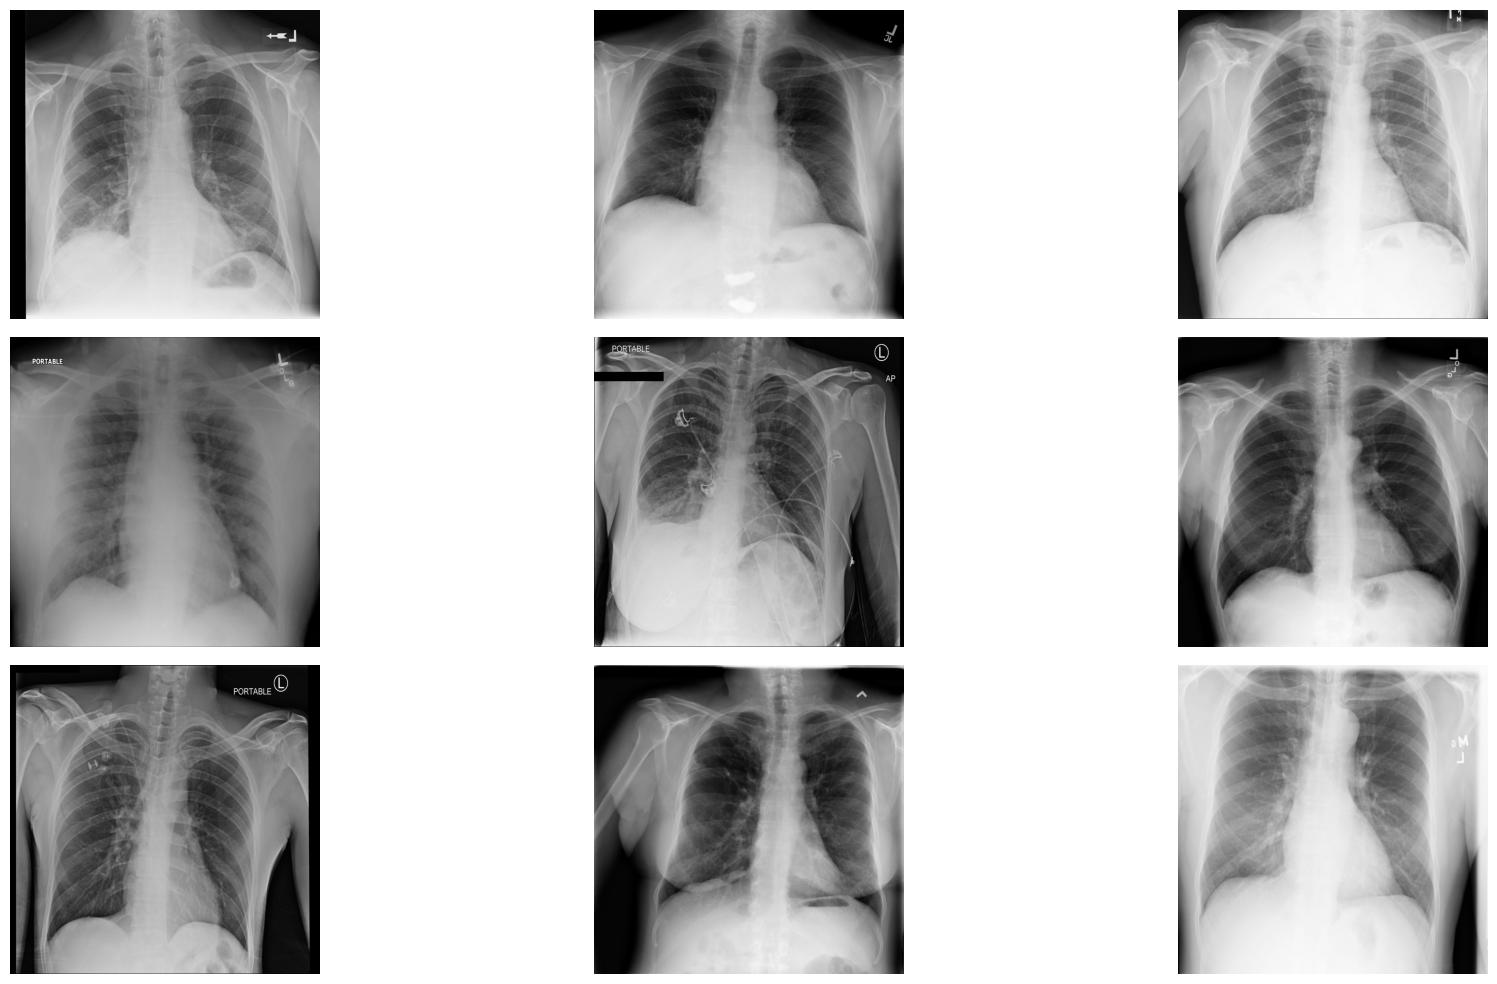

In [16]:
import random
#Visulaizing a random selection of images from the dataset

#Extract numpy values from Image column in data frame
images = train_df['Image'].values

#Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

#Location of image dir
img_dir = 'data/nih/images-small/'

print('Display Random Images')

#Adjust the size of your images
plt.figure(figsize=(20,10))

#Iterate and plot random images
for i in range(9):
    plt.subplot(3,3,i+1)
    img = plt.imread(os.path.join(img_dir,random_images[i]))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    
#Adjust subplot parameters to give specified padding
plt.tight_layout()

#### Investing a Single Image

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9804 and the minimum is 0.2757
The mean value of the pixels is 0.4796 and the standard deviation is 0.2757


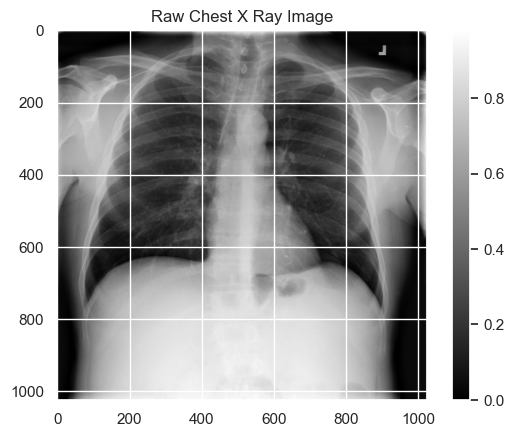

In [18]:
#Get the first image that was listed in the train_df dataframe
sample_img = train_df.Image[0]
raw_image = plt.imread(os.path.join(img_dir,sample_img))
plt.imshow(raw_image,cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.std():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

#### Investigating Pixel Vlaue Distribution

/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-8.805555555555555, 0.5, '# Pixels in Image')

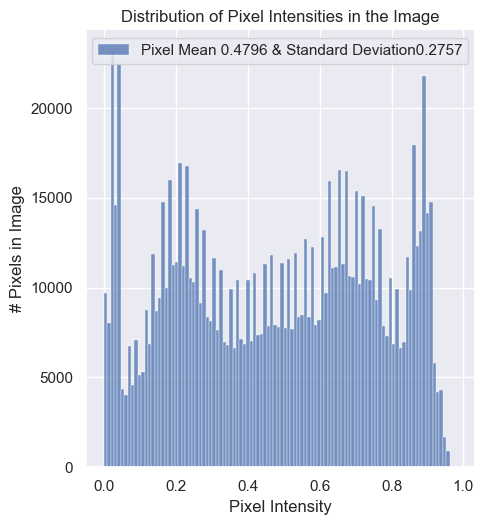

In [19]:
#Plot the histogram of distribution of pixels
sns.displot(raw_image.ravel(),
           label =f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation{np.std(raw_image):.4f}',kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

#### Image Processing in Keras

In [20]:
#Use keras ImageDataGeneartor function to perform data preprocessing and data augmentation

#Import data genertor from keras
from keras.preprocessing.image import ImageDataGenerator

In [21]:
#Normalise images
image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization=True #Divide each input by its standard deviation
)

#### Standardization

In [23]:
#Flow from directory with specified batch size and target image size
generator = image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = 'data/nih/images-small',
    x_col = "Image", #features
    #Let's say we build a model for mass detection
    y_col = ['Mass'], #labels
    class_mode = "raw", #'Mass' column should be in train_df
    batch_size = 1,#images per batch
    shuffle = False , # shuffle the rows or not
    target_size = (320,320) #width and height of output image
)


Found 1000 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimesions of the image are 320 pixel width and 320 pixels height
The maximum pixel value is 1.7999 and the minimum is -1.7404
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


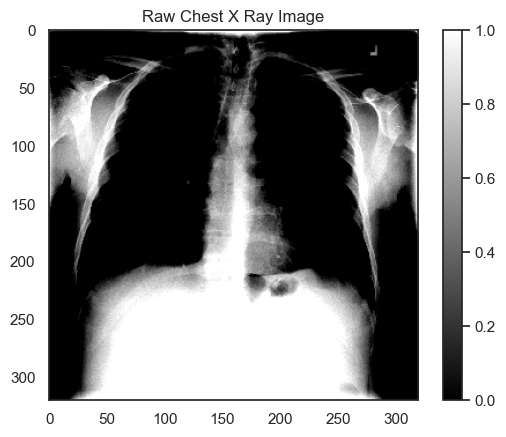

In [26]:
#Plot a pre-processed image
sns.set_style("white")
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0],cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimesions of the image are {generated_image.shape[1]} pixel width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-8.805555555555555, 0.5, '# Pixel')

<Figure size 1000x700 with 0 Axes>

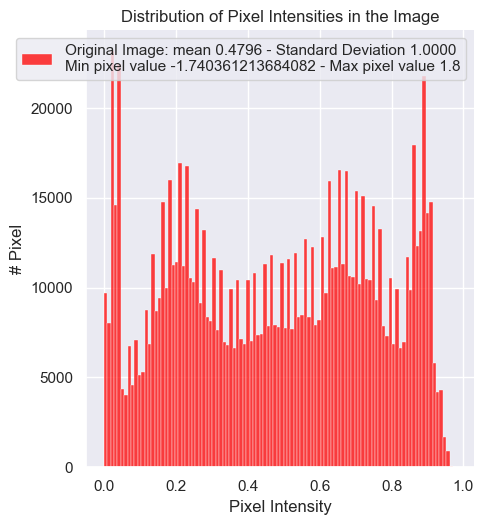

In [27]:
#Comparison of the distribution pf pixel values in the new pre-processed image versus the raw image

#Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10,7))

#Plot histogram for original image
sns.displot(raw_image.ravel(),
           label = f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
           f'Min pixel value {np.min(generated_image[0]):4} - Max pixel value {np.max(generated_image[0]):.4}',
           color='red',
           kde = False)

#Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')